<a href="https://colab.research.google.com/github/hillerj1/PHY_310/blob/main/ChaoticPend_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaotic Pendulum

## By Josh Hiller

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

### Runge-Kutta 4 (Numerical Method)

In [ ]:
def RK4(F, x_initial, time_step, n):
    '''Iterates over a certain time step to evaluate
    initial-value higher order differential equations.
    Allows for dynamic analyses for real life applications.
    Such as simulations of a damped driven pendulum'''
    ts = np.zeros((n+1,)) + 0
    xs = np.array([x_initial] * (n+1))
    for i in range(n):
        k1 = F(xs[i], ts[i]) * time_step
        k2 = F(xs[i] + (k1/2), ts[i] + (time_step/2)) * time_step
        k3 = F(xs[i] + (k2/2), ts[i] + (time_step/2)) * time_step
        k4 = F(xs[i] + k3, ts[i] + time_step) * time_step
        xs[i+1] = xs[i] + ((k1 + (2*k2) + (2*k3) + k4)/6)
        ts[i+1] = ts[i] + time_step

    return ts, xs

### Damped-Driven Pendulum Diff. Eqn.

In [ ]:
def create_chaotic_pend_function(beta, omega0, gamma, omega_d):
    '''Takes a function of 4 variables and outputs
    a two variable array of the defined differential equation'''
    def chaotic_pend_fixed(x, t):
        phi, phi_dot = x
        phi_ddot = -omega0**2 * np.sin(phi) -2 * beta * phi_dot + gamma * omega0**2 * np.sin(omega_d * t)
        return np.array([phi_dot, phi_ddot])
    return chaotic_pend_fixed

### Test Cell / Observations as $\gamma$ Increases

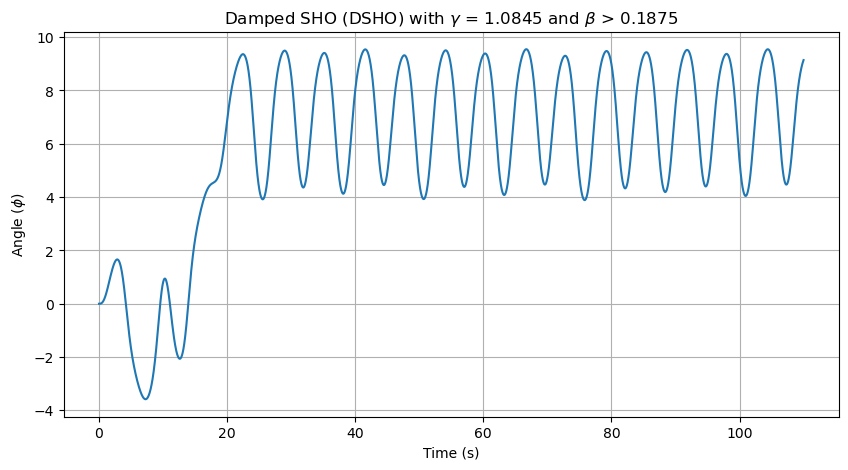

In [ ]:
# Sets initial conditions for oscillation graphs
gamma = 1.0845
beta = .75/2
omega_d = 1
omega0 = 1.5
x_initial = [0.0, 0.0]
time_step = 0.01
t_max = 110
n = int(t_max / time_step)

# Runs chaotic pendulum function through RK4 to find times and positional values of phi
chaotic_pend_func = create_chaotic_pend_function(beta, omega0, gamma, omega_d)
ts, xs = RK4(chaotic_pend_func, x_initial, time_step, n)
phi_values = xs[:, 0]

plt.figure(figsize=(10, 5))
plt.plot(ts, phi_values)
plt.title(rf'Damped SHO (DSHO) with $\gamma$ = {gamma} and $\beta$ > {beta/2}')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle ($\phi$)')
plt.grid()
plt.show()

### Sampled $\phi$ and $\dot{\phi}$ values

In [ ]:
# DSHO with gamma = 0 and beta > 0
beta = .75/2
omega_d = 1
omega0 = 1.5
x_initial = [0.0, 0.0]
time_step = 0.01
t_max = 110
n = int(t_max / time_step)

def sample(gamma):
    x_initial = [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)]

    def chaotic_pend_fixed(x, t):
        phi, phi_dot = x
        phi_ddot = -omega0**2 * np.sin(phi) -2 * beta * phi_dot + gamma * omega0**2 * np.sin(omega_d * t)
        return np.array([phi_dot, phi_ddot])

    T_d = 2 * np.pi / omega_d

    ts, xs = RK4(chaotic_pend_fixed, x_initial, time_step, n)

    phi_values = xs[:, 0]
    phi_dot_values = xs[:, 1]

    sample_interval = int(T_d / time_step)
    sampled_phis = phi_values[sample_interval::sample_interval]
    sampled_phi_dots = phi_dot_values[sample_interval::sample_interval]

    return (sampled_phis[-1] % (2 * np.pi)), sampled_phi_dots[-1]

### Plotting $\gamma$ vs. Sampled $\phi$ and $\dot{\phi}$ / Observing Bifurcation

In [ ]:
points = 10000
beta = .75/2
omega_d = 1
omega0 = 1.5
time_step = 0.01
t_max = 100
n = int(t_max / time_step)

gamma_values = [random.uniform(0.8, 1.6) for _ in range(points)]

start = time.time()
phi = [sample(g)[0] for g in gamma_values]
end = time.time()
print('Time taken', (end-start), 'seconds')

Time taken 10222.318983078003 seconds


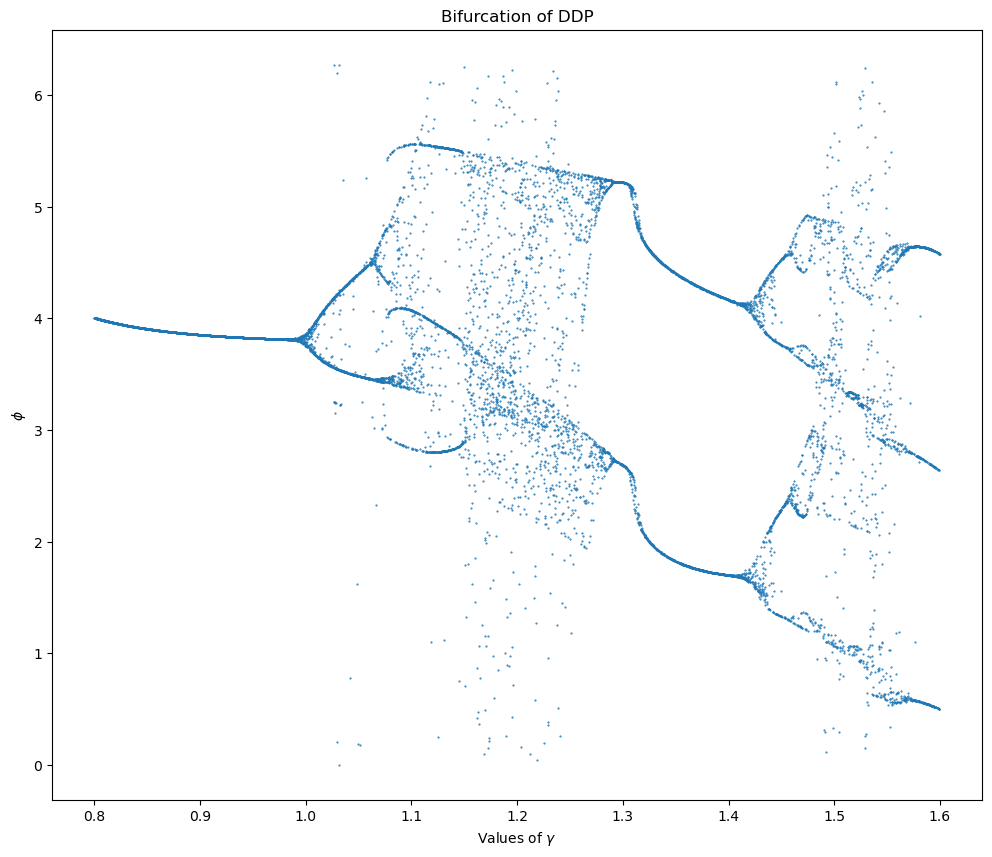

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(gamma_values, phi, s=.25)
plt.title('Bifurcation of DDP')
plt.xlabel(r'Values of $\gamma$')
plt.ylabel(r'$\phi$')
plt.show()